In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
def plot_confusion_matrix(model_type, cm, target_names, title, cmap=None, normalize=True):
    """
    link: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix 
    given a sklearn confusion matrix (cm), make a nice plot
    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    filename = './'+ model_type + '/'+ model_type + '_confusion_matrix.png'
    plt.imshow(filename)
    plt.close()

In [10]:
def plot_bar_graphs(emotion_keys, true_counts, pred_counts, model_type):
    index = np.arange(len(emotion_keys))
    
    # Only true labels
    plt.bar(index, true_counts)
    plt.xticks(index, emotion_keys)
    plt.ylabel('Count')
    plt.ylim(0, 800)
    plt.title('True Labels by Mask Adherence')
    filename = './'+ model_type + '/'+ model_type + '_true_labels_bar.png'
    plt.savefig(filename)
    plt.close()
    
    # Only predicted labels
    plt.bar(index, pred_counts)
    plt.xticks(index, emotion_keys)
    plt.ylabel('Count')
    plt.ylim(0, 800)
    plt.title('Predicted Labels by Mask Adherence')
    filename = './'+ model_type + '/'+ model_type + '_predicted_labels_bar.png'
    plt.savefig(filename)
    plt.close()
    
    # Both labels
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, true_counts, bar_width, alpha=opacity, color='b', label='True Labels')
    rects2 = plt.bar(index + bar_width, pred_counts, bar_width, alpha=opacity, color='g', label='Predicted Labels')

    plt.xlabel('Mask Adherence')
    plt.ylabel('Count')
    plt.title('True Labels and Predicted Labels')
    plt.xticks(index + bar_width / 2, emotion_keys)
    plt.legend()

    plt.tight_layout()
    filename = './'+ model_type + '/'+ model_type + '_both_labels_bar.png'
    plt.savefig(filename)
    plt.close()

In [11]:
def create_plots(labels, predictions, emotion_keys, model_type):
    matrix = confusion_matrix(labels, predictions)
    
    true_counts = np.zeros((len(emotion_keys)))
    pred_counts = np.zeros((len(emotion_keys)))
    
    for val in range(len(emotion_keys)):
        true_counts[val] = np.count_nonzero(labels == val)
        pred_counts[val] = np.count_nonzero(predictions == val)
    
    plot_confusion_matrix(model_type   = model_type,
                          cm           = matrix,
                          normalize    = True,
                          target_names = emotion_keys,
                          title        = "Confusion Matrix")
    
    plot_bar_graphs(emotion_keys, true_counts, pred_counts, model_type)

In [12]:
keys = ['no mask', 'mask', 'incorrect mask']
labels = np.load('./results/y_test.npy')
predictions = np.load('./results/y_test_pred.npy')

In [13]:
labels = np.argmax(labels, axis=1)
predictions = np.argmax(predictions, axis=1)

In [14]:
labels, predictions

(array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2,
        1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2,
        2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0,
        0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2,
        0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1,
        2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2,
        1, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2,
        1, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 2,
        2, 1, 1, 1, 2, 0]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 1,
        1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2,
        0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0,
        0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0,
        0,

TypeError: Image data of dtype <U40 cannot be converted to float

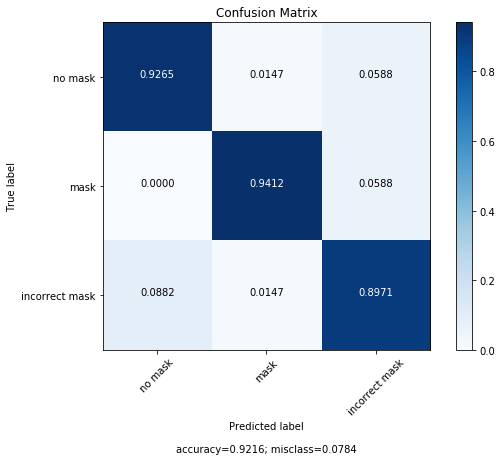

In [15]:
model_type = 'cnn_test'
create_plots(labels, predictions, keys, model_type)
accuracy_score(labels, predictions)